In [28]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from ipywidgets import interact
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [29]:
df=pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


<Axes: >

<Axes: xlabel='humidity', ylabel='label'>

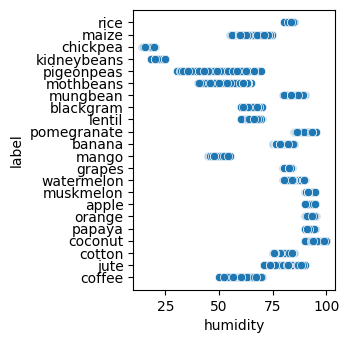

In [30]:
plt.subplot(2,4,7)
sns.scatterplot(x=df['humidity'],y=df['label'])


<Axes: ylabel='count'>

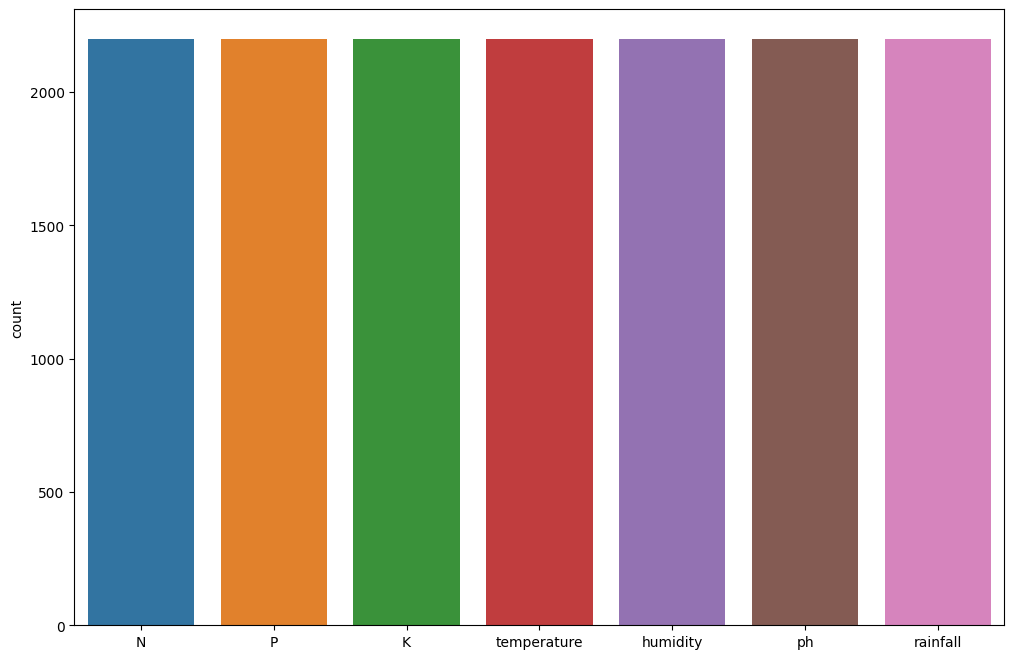

In [31]:
sns.countplot(df)

In [32]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.shape

(2200, 8)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [34]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Figure size 800x400 with 0 Axes>

<Axes: >

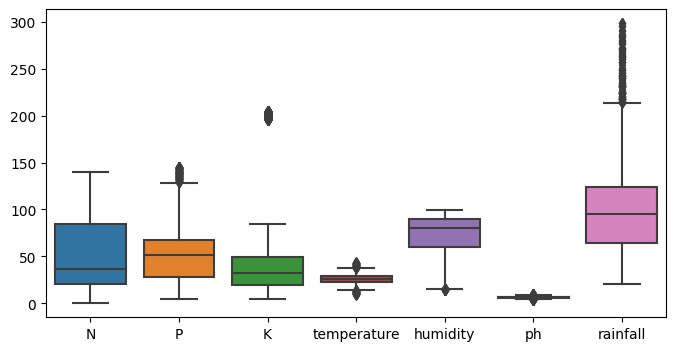

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(df)


In [36]:
# Check if 'phosphorous' column exists in df
if 'phosphorous' in df.columns:
    Q1 = df['phosphorous'].quantile(0.25)
    Q3 = df['phosphorous'].quantile(0.75)
    IQR = Q3 - Q1

    # Use loc to filter the DataFrame
    filter_condition = (df['phosphorous'] >= Q1 - 1.5 * IQR) & (df['phosphorous'] <= Q3 + 1.5 * IQR)
    df = df.loc[filter_condition]
else:
    print("Column 'phosphorous' does not exist in the DataFrame.")


Column 'phosphorous' does not exist in the DataFrame.


In [37]:
print("Summer crops")
print(df[(df['temperature' ]>30) & (df['humidity']>50)]['label'].unique())
print("--- --")
print("Winter crops")
print(df[ (df['temperature' ]<20) & (df['humidity']>30)]['label'].unique())
print("-- --")
print("Rainy crops")
print(df[(df['rainfall']>200) & (df['humidity']>50)]['label'].unique())
print("--- ----")


Summer crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--- --
Winter crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-- --
Rainy crops
['rice' 'papaya' 'coconut']
--- ----


In [38]:
y=df['label']
x=df.drop(['label'], axis=1)

In [39]:
print("Shape of x",x.shape)
print("Shape of x=y",y.shape)

Shape of x (2200, 7)
Shape of x=y (2200,)


In [14]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [40]:
print("The shape of x train",x_train.shape)
print("The shape of x test",x_test.shape)
print("The shape of y train",x_train.shape)
print("The shape of y test",x_test.shape)

The shape of x train (1760, 7)
The shape of x test (440, 7)
The shape of y train (1760, 7)
The shape of y test (440, 7)


KMeans(n_clusters=1, n_init=10, random_state=0)

KMeans(n_clusters=2, n_init=10, random_state=0)

KMeans(n_clusters=3, n_init=10, random_state=0)

KMeans(n_clusters=4, n_init=10, random_state=0)

KMeans(n_clusters=5, n_init=10, random_state=0)

KMeans(n_clusters=6, n_init=10, random_state=0)

KMeans(n_clusters=7, n_init=10, random_state=0)

KMeans(n_init=10, random_state=0)

KMeans(n_clusters=9, n_init=10, random_state=0)

KMeans(n_clusters=10, n_init=10, random_state=0)

Text(0.5, 1.0, 'The Elbow method')

Text(0.5, 0, 'No of clusters')

Text(0, 0.5, 'wcss')

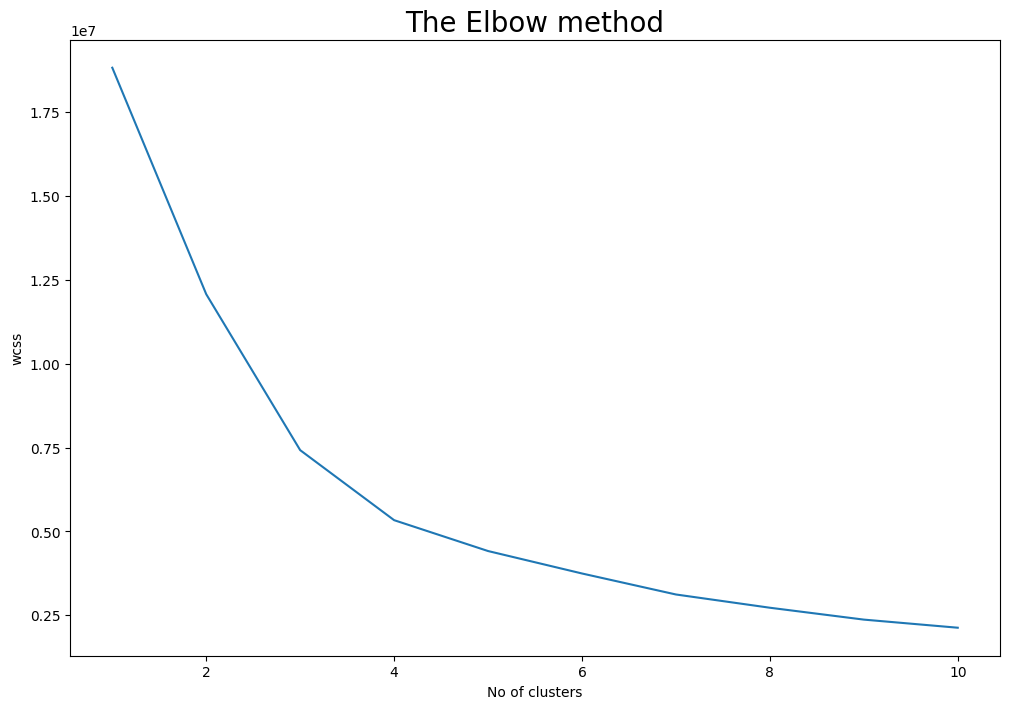

In [41]:
# el-bow method used to find out no of clusters and determine the optimum number of clusters within the dataset. plt.rcParams['figure.figsize']=(10,4)
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init="k-means++", max_iter=300,n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow method", fontsize=20)
plt.xlabel("No of clusters")
plt.ylabel("wcss")
plt.show()

In [42]:
from sklearn.cluster import KMeans

# Assuming x is your feature data and df['label'] is your target variable
km = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)  # Corrected variable name

a = df['label']
y_means = pd.DataFrame(y_means)  # Corrected variable name

z = pd.concat([y_means, a], axis=1)  # Corrected variable name
z = z.rename(columns={0: 'cluster'})
print("Let's check the results after applying the K-Means clustering analysis \n")
print("Crops in First cluster:", z[z['cluster'] == 0]['label'].unique())
print("_____________________________________________________")
print("Crops in Second cluster:", z[z['cluster'] == 1]['label'].unique())
print("_______________________________________________________")
print("Crops in Third cluster: ", z[z['cluster'] == 2]['label'].unique())
print("___________________________________________________________")
print("Crops in Fourth cluster:", z[z['cluster'] == 3]['label'].unique())


Let's check the results after applying the K-Means clustering analysis 

Crops in First cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
_____________________________________________________
Crops in Second cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
_______________________________________________________
Crops in Third cluster:  ['grapes' 'apple']
___________________________________________________________
Crops in Fourth cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import pickle  # Import the pickle module

# Your existing code...


In [44]:
# LOGUSTIC REGRESSION
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<Axes: >

Text(0.5, 1.0, 'Confusion matrix for logistic regression')

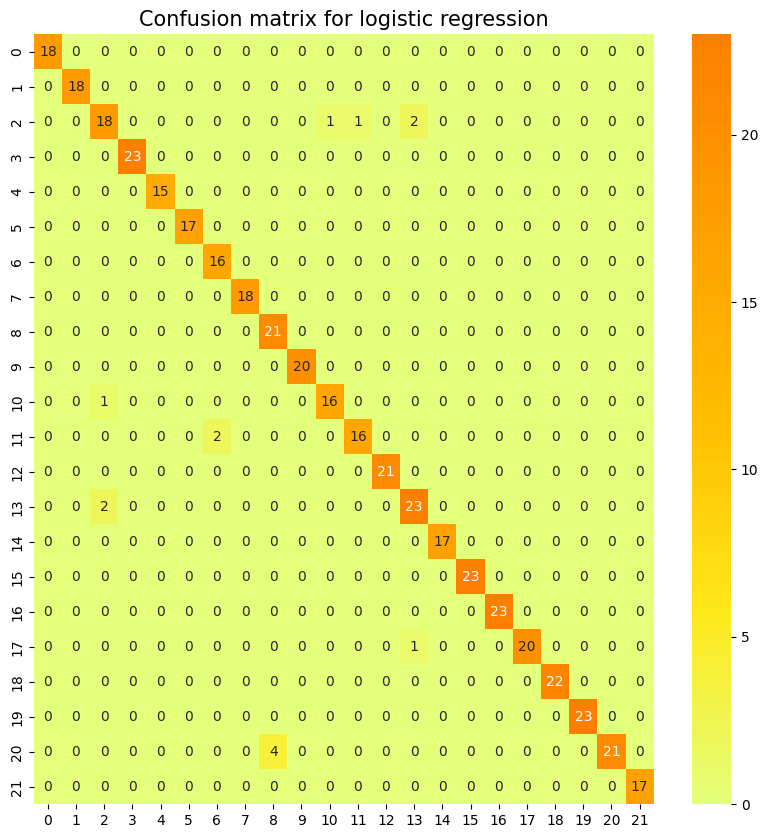

In [45]:
# Let's evaluate model performance
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your actual and predicted labels
# Make sure you have already defined y_test and y_pred

# Let's print the confusion matrix first
plt.rcParams["figure.figsize"] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')  # Corrected colormap name
plt.title("Confusion matrix for logistic regression", fontsize=15)
plt.show()


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [46]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [48]:
with open('logistic_regression_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [49]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [50]:
from sklearn.metrics import classification_report
cr=classification_report (y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [51]:
prediction=model.predict((np.array([[105,35,40,25,64,7,160]])))
print("The suggested crop for given climatic condition is: ", prediction)

The suggested crop for given climatic condition is:  ['coffee']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
